In [3]:
import networkx as nx
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from itertools import count, product

In [2]:
%matplotlib inline

Global Variables

Generally, designate the number of nodes as n and the number of colors as c.

In [4]:
num_nodes = 6
num_colors = 3

current_node = 1
previous_node = 0

Functions:

In [4]:
def iterate_color(G, node):
    current_color = nx.get_node_attributes(G, 'color')[node]
    new_color = (current_color + 1) % num_colors
    nx.set_node_attributes(G, {node : {'color' : new_color}})

In [5]:
def reverse_iterate_color(G, node):
    current_color = nx.get_node_attributes(G, 'color')[node]
    new_color = (current_color - 1) % num_colors
    nx.set_node_attributes(G, {node : {'color' : new_color}})

In [6]:
def backtrack(G, start_node, end_node):
    """Simulate a step in the puzzle, but backwards,
    reverse-iterating the color of the end node.
    
    Args:
        G (networkx.Graph): graph representing the puzzle.
        start_node (int): the node the step began from.
        end_node (int): the node the step ended on.
        
    Returns:
        bool : True if the backtrack was successful, False otherwise 
        (usually only if start_node is the same as previous_node)
    """
    global current_node, previous_node
    if(start_node == previous_node):
        return False
    current_node = start_node
    previous_node = end_node
    reverse_iterate_color(G, end_node)
    return True

In [7]:
def set_all_colors(G, new_colors):
    new_color_dict = dict(enumerate([{'color' : color} for color in new_colors]))
    nx.set_node_attributes(G, new_color_dict)

In [8]:
def find_solvable_configs(G, num_steps, final_node):
    set_all_colors(G, all_configs[0])
    solvable_configs = set()
    solvable_configs.add(tuple(nx.get_node_attributes(G, 'color').values())) #solved configuration in set
    global current_node, previous_node 
    current_node = final_node
    previous_node = final_node #since we're looking for all solvable configs, player could have come to final node from anywhere, so doesn't matter
    i = 0
    while i < num_steps:
        next_node = rand.randint(0, num_nodes - 1)
        #generate a new random direction until it's a valid backtrack from the current node
        while (current_node, next_node) not in G.edges():
            next_node = rand.randint(0, num_nodes - 1)
        #if backtracking to the next node would be a repeat movement, try again
        if(not backtrack(G, next_node, current_node)):
            continue
        current_config = tuple(nx.get_node_attributes(G, 'color').values())
        solvable_configs.add(current_config)
        i += 1
    return solvable_configs

Initialize graph in solved configuration:

In [9]:
G = nx.Graph()
G.add_nodes_from(np.arange(num_nodes))
nx.set_node_attributes(G, 0, name = 'color')
edge_list = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 5), (4, 5)]
G.add_edges_from(edge_list)

Visualizing the solved puzzle (all colors are 0):

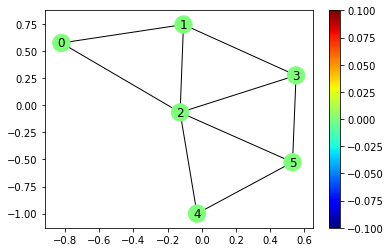

In [10]:
colors = set(nx.get_node_attributes(G, 'color').values())
mapping = dict(zip(sorted(colors), count()))
nodes = G.nodes()
colors = [mapping[G.node[n]['color']] for n in nodes]

pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos)
nc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, 
                            with_labels=True, cmap=plt.cm.jet)
labels = nx.draw_networkx_labels(G, pos)
plt.colorbar(nc)
plt.show()

We generate the set of all possible n-tuples with elements drawn from ZZ_c:

In [5]:
all_configs = list(product(range(0, num_colors), repeat = num_nodes))

The number of possible configurations is equal to c^n:

In [12]:
num_configs = len(all_configs)
num_configs

729

Grabbing a random configuration:

In [13]:
selected = all_configs[rand.randint(0, num_configs - 1)]
selected

(2, 1, 2, 1, 1, 2)

In [14]:
set_all_colors(G, selected)

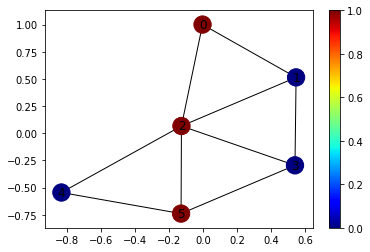

In [15]:
colors = set(nx.get_node_attributes(G, 'color').values())
mapping = dict(zip(sorted(colors), count()))
nodes = G.nodes()
colors = [mapping[G.node[n]['color']] for n in nodes]

pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos)
nc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, 
                            with_labels=True, cmap=plt.cm.jet)
labels = nx.draw_networkx_labels(G, pos)
plt.colorbar(nc)
plt.show()

Random backtracking: starting from solved configuration, repeatedly backtrack in random directions, adding each new configuration to the set of solvable configurations. Since each backtrack configuration is reachable from the solved configuration, it's solvable.

In [16]:
solvable = find_solvable_configs(G, 10000, 0)
len(solvable)

729

Now test on a puzzle we know shouldn't be 100% solvable:

In [17]:
num_nodes = 3
num_colors = 3

In [18]:
G2 = nx.Graph()
G2.add_nodes_from(np.arange(num_nodes))
nx.set_node_attributes(G2, 0, name = 'color')
edge_list = [(0, 1), (1, 2), (2, 0)]
G2.add_edges_from(edge_list)

In [19]:
def draw_current_config(G):
    colors = set(nx.get_node_attributes(G, 'color').values())
    mapping = dict(zip(sorted(colors), count()))
    nodes = G.nodes()
    colors = [mapping[G.node[n]['color']] for n in nodes]

    pos = nx.spring_layout(G)
    nx.draw_networkx_edges(G, pos)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, 
                                with_labels=True, cmap=plt.cm.jet)
    labels = nx.draw_networkx_labels(G, pos)
    plt.colorbar(nc)
    plt.show()

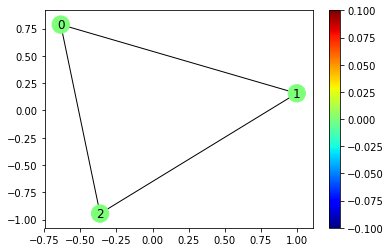

In [20]:
draw_current_config(G2)

In [21]:
all_configs = list(product(range(0, num_colors), repeat = num_nodes))
len(all_configs)

27

In [22]:
solvable = find_solvable_configs(G2, 1000, 0)
len(solvable)

9

In [24]:
solvable

{(0, 0, 0),
 (0, 1, 0),
 (0, 1, 1),
 (1, 1, 1),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 2),
 (2, 2, 2)}

Find which configurations are unsolvable:

In [23]:
unsolvable = set(all_configs) - solvable
len(unsolvable)

18

In [25]:
unsolvable

{(0, 0, 1),
 (0, 0, 2),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 2),
 (1, 2, 0),
 (2, 0, 1),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1)}

In [26]:
G.degree()

DegreeView({0: 2, 1: 3, 2: 5, 3: 3, 4: 2, 5: 3})